# Compute performance metrics for the given Y and Y_score without sklearn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# other than these two you should not import any other packages

<pre>
<font color='red'><b>A.</b></font> Compute performance metrics for the given data <strong>5_a.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [2]:
df = pd.read_csv("5_a.csv")
df.head()

,y,proba
0,1.0,0.637387
1,1.0,0.635165
2,1.0,0.766586
3,1.0,0.724564
4,1.0,0.889199


In [3]:
y = df.y.value_counts().to_list()

In [4]:
print("Positive Label:{0} and Negative label :{1}".format(y[0],y[1]))

Positive Label:10000 and Negative label :100


In [5]:
def predict(probabilityScore,threshold):
    y_predict =  [1 if i > 0.5 else 0 for i in probabilityScore]
    return y_predict


In [6]:
df['y_predict'] = predict(df.proba.to_numpy(),0.5)
df.head()

,y,proba,y_predict
0,1.0,0.637387,1
1,1.0,0.635165,1
2,1.0,0.766586,1
3,1.0,0.724564,1
4,1.0,0.889199,1


In [7]:
def confusionMatrix(actual_value,predicted_value):
    
    #Create a numpy 2d matrix assigned as zero
    confusion_matrix = np.zeros((2,2))
    for y,y_hat in zip(range(len(actual_value)),range(len(predicted_value))):

        if (actual_value[y] == 0 and predicted_value[y_hat] == 0):

            confusion_matrix[0,0] += 1
        elif(actual_value[y] == 0 and predicted_value[y_hat] == 1):
            confusion_matrix[1,0] += 1

        elif(actual_value[y] == 1 and predicted_value[y_hat] == 0):
            confusion_matrix[0,1] += 1
        else:
            confusion_matrix[1,1] += 1
    return confusion_matrix

In [8]:
actual_value = df.y.to_numpy()
predicted_value = df.y_predict.to_numpy()

confusion_matrix = confusionMatrix(actual_value,predicted_value)

print("Confusion Matrix :{0}".format(confusion_matrix))

Confusion Matrix :[[    0.     0.]
 [  100. 10000.]]


In [9]:
def precisionScore(actual_value,predicted_value):
    
    true_positive = 0
    false_positive = 0
    precision_score = 0.0
    for y,y_hat in zip(range(len(actual_value)),range(len(predicted_value))):
        
        if(actual_value[y] == 0 and predicted_value[y_hat] == 1):
            false_positive += 1
            
        elif (actual_value[y] == 1 and predicted_value[y_hat] == 1):
            true_positive += 1
    precision_score = true_positive / (true_positive + false_positive)
    return precision_score

In [10]:
actual_value = df.y.to_numpy()
predicted_value = df.y_predict.to_numpy()
print("Precision Score of the Dataset :{0}".format(precisionScore(actual_value,predicted_value)))
precision_score = precisionScore(actual_value,predicted_value)

Precision Score of the Dataset :0.9900990099009901


In [11]:
#recall Score is also called as true positive rate recall = true_positive / false_negative + true_positive 
def recallScore(actual_value,predicted_value):
    true_positive = 0
    false_negative = 0
    recall_score = 0.0
    for y,y_hat in zip(range(len(actual_value)),range(len(predicted_value))):
        
        if (actual_value[y] == 1 and predicted_value[y_hat] == 0):
            false_negative += 1
            
        elif(actual_value[y] == 1 and predicted_value[y_hat] == 1):
            true_positive += 1
    recall_score = true_positive / (true_positive + false_negative)
    
    return recall_score
    

In [12]:
actual_value = df.y.to_numpy()
predicted_value = df.y_predict.to_numpy()
print("Recall Score of the Dataset :{0}".format(recallScore(actual_value,predicted_value)))
recall_score = recallScore(actual_value,predicted_value)

Recall Score of the Dataset :1.0


In [13]:
#F1 Score = hormonic mean of precsion and recall
def f1Score(precisionScore,recallScore):
    return 2 * ((precisionScore * recallScore) / (precisionScore + recallScore))
print("F1Score :{0}".format(f1Score(precision_score,recall_score)))

F1Score :0.9950248756218906


AUCSCORE = 0.48829900000000004


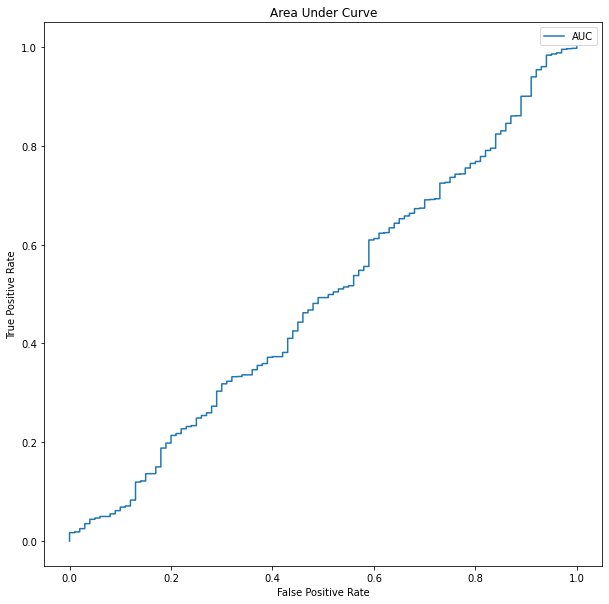

In [14]:
def auc(actualValue,probabilityScore,threshold):
    
    predictedValue = np.where(probabilityScore >= threshold,1,0)
    confusion_matrix = confusionMatrix(actualValue,predictedValue)
    totalSum = np.sum(confusion_matrix,axis = 0)
    
    #positive  class
    totalPositive = totalSum[1]
    totalNegative = totalSum[0]
    TPR = confusion_matrix[1,1] / totalPositive
    FPR = confusion_matrix[1,0] / totalNegative
    
    return [TPR,FPR]


TPRList =[]
FPRList = []

dataframeSorted = df.sort_values(by='proba',ascending = False)

actualValue = dataframeSorted.y.to_numpy()
probabilityValue = dataframeSorted.proba.unique()

for threshold in probabilityValue[:]:
    areaUnderCurve = auc(actualValue,probabilityValue,threshold)
    TPRList.append(areaUnderCurve[0])
    FPRList.append(areaUnderCurve[1])
aucScore = np.trapz(TPRList,FPRList)
print("AUCSCORE = {}".format(aucScore))
plt.figure(figsize = (10,10))
plt.plot(FPRList,TPRList)
plt.title("Area Under Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(['AUC'], loc = 'upper right')
plt.show()

In [15]:
#np.ravel is flattern the array
#np.diagonal - is sum of diagonal
#np.trace() - isn sum of the diagonal
#https://www.geeksforgeeks.org/calculate-the-sum-of-the-diagonal-elements-of-a-numpy-array/
accuracyScore = np.sum(np.diagonal(confusion_matrix))/np.sum(np.ravel(confusion_matrix))
print(accuracyScore)

0.9900990099009901


<pre>
<font color='red'><b>B.</b></font> Compute performance metrics for the given data <strong>5_b.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a></li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [16]:
df2 = pd.read_csv("5_b.csv")
df2.head()

,y,proba
0,0.0,0.281035
1,0.0,0.465152
2,0.0,0.352793
3,0.0,0.157818
4,0.0,0.276648


In [17]:
df2.shape

(10100, 2)

In [18]:
y = df2.y.value_counts()
print("Positive Label:{0} and Negative label :{1}".format(y[1],y[0]))

Positive Label:100 and Negative label :10000


In [19]:
df2['y_predict'] = predict(df2.proba.to_numpy(),0.5)
df2.head()

,y,proba,y_predict
0,0.0,0.281035,0
1,0.0,0.465152,0
2,0.0,0.352793,0
3,0.0,0.157818,0
4,0.0,0.276648,0


In [20]:
actualValue = df2['y'].to_numpy()
predictedValue = df2['y_predict'].to_numpy()
confusion_matrix = confusionMatrix(actualValue,predictedValue)
print("Confusion Matrix = {0}".format(confusion_matrix))

Confusion Matrix = [[9761.   45.]
 [ 239.   55.]]


In [21]:
recall_score = recallScore(actualValue,predictedValue)
precision_Score = precisionScore(actualValue,predictedValue)
print("Recall Score of the Dataset :{0}".format(recall_score))
print("Precision Score of the Dataset :{0}".format(precisionScore(actualValue,predictedValue)))
print("F1Score :{0}".format(f1Score(precision_Score,recall_score)))

Recall Score of the Dataset :0.55
Precision Score of the Dataset :0.1870748299319728
F1Score :0.2791878172588833


In [22]:
accuracyScore = np.sum(np.diagonal(confusion_matrix))/np.sum(np.ravel(confusion_matrix))
print("AccuracyScore = {0}".format(accuracyScore))

AccuracyScore = 0.9718811881188119


AUCSCORE = 0.9377570000000001


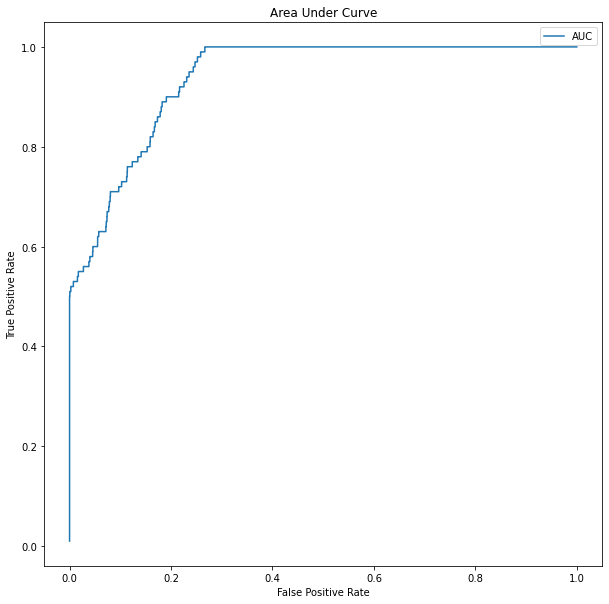

In [23]:
#Area Under Curve

TPRList =[]
FPRList = []

dataframeSorted = df2.sort_values(by='proba',ascending = False)

actualValue = dataframeSorted.y.to_numpy()
probabilityValue = dataframeSorted.proba.unique()

for threshold in probabilityValue[:]:
    areaUnderCurve = auc(actualValue,probabilityValue,threshold)
    TPRList.append(areaUnderCurve[0])
    FPRList.append(areaUnderCurve[1])
aucScore = np.trapz(TPRList,FPRList)
print("AUCSCORE = {}".format(aucScore))
plt.figure(figsize = (10,10))
plt.plot(FPRList,TPRList)
plt.title("Area Under Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(['AUC'], loc = 'upper right')
plt.show()

<font color='red'><b>C.</b></font> Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data <strong>5_c.csv</strong>
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [24]:
df3 = pd.read_csv('5_c.csv')
df3.head()

,y,prob
0,0,0.458521
1,0,0.505037
2,0,0.418652
3,0,0.412057
4,0,0.375579


In [25]:
print("Shape of the Data : {0}".format(df3.shape))

Shape of the Data : (2852, 2)


In [26]:
df3.y.value_counts()

0    1805
1    1047
Name: y, dtype: int64

In [27]:
df3['y_predict'] = predict(df3.prob.to_numpy(),0.5)
df3.head()

,y,prob,y_predict
0,0,0.458521,0
1,0,0.505037,1
2,0,0.418652,0
3,0,0.412057,0
4,0,0.375579,0


In [28]:
df3.prob.nunique()

2791

In [29]:
#Compute the unique Value 
df3_sorted = df3.sort_values(by = 'prob' , ascending = True)
df3_sorted.head()

,y,prob,y_predict
473,0,0.028038,0
412,0,0.028396,0
454,0,0.028964,0
435,0,0.030269,0
468,0,0.031114,0


In [30]:
def ROC(actualValue,probabilityScore,threshold):
    
    predictedValue = np.where(probabilityScore >= threshold,1,0)
    confusion_matrix = confusionMatrix(actualValue,predictedValue)
    
    falsePositive = confusion_matrix[1,0]
    falseNegative = confusion_matrix[0,1]
    
    A = (500 * falseNegative) + (100 * falsePositive)
    
    return A

In [31]:
actualValue = df3_sorted.y.to_numpy()
uniqueProbValue = df3_sorted.prob.unique()
probabilityScore = df3_sorted.prob.to_numpy()
thresholdDict = {}
for threshold in uniqueProbValue:
    probValue = ROC(actualValue,probabilityScore,threshold)
    thresholdDict[threshold] = probValue
minValue = min(thresholdDict.values())
minValueAndThreshold = [(threshold,value) for threshold, value in thresholdDict.items() if value == minValue]
print("The minimum value is {0} and the threshold is {1}".format(minValueAndThreshold[0][0] , minValueAndThreshold[0][1]))

The minimum value is 0.2300390278970873 and the threshold is 141000.0


<pre>
<font color='red'><b>D.</b></font> Compute performance metrics(for regression) for the given data <strong>5_d.csv</strong>
    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [32]:
df4 = pd.read_csv('5_d.csv')
df4.head()

,y,pred
0,101.0,100.0
1,120.0,100.0
2,131.0,113.0
3,164.0,125.0
4,154.0,152.0


In [33]:
print("Shape of the data :{0}".format(df4.shape))

Shape of the data :(157200, 2)


In [34]:
#Mean Square Error
y = df4.y.to_numpy()
y_hat = df4.pred.to_numpy()

MSE = np.sum((y-y_hat)**2) / len(y)
print("Mean Squared Error = {0}".format(MSE))

Mean Squared Error = 177.16569974554707


In [35]:
#Mean Absolute Error
#check if any actual Value is zero
print(df4.loc[df4.y == 0].shape)
#so in this Problem 5717 actual Value as ZERO

actualValueSum = np.sum(y)

MAPE = np.sum(np.absolute(y-y_hat))/actualValueSum
print("Mean Absolute Percentage Error : {0}".format(MAPE))

(5717, 2)
Mean Absolute Percentage Error : 0.1291202994009687


In [36]:
#r2-Square

SSresidual = np.sum((y-y_hat) ** 2)
SStotal = np.sum((y-np.mean(y)) ** 2)

r2Score = 1 - (SSresidual / SStotal)

print("R2 Score = {0}".format(r2Score))


R2 Score = 0.9563582786990937
